## The Python data science stack

![](./stack_empty.png)

To analyze the data using pandas and scikit-learn, you can perform the following steps in Python:

1. Load the data into a pandas DataFrame.
2. Preprocess the data (e.g., handling missing values, converting data types, etc.).
3. Feature selection and data splitting for machine learning models.
4. Apply machine learning models for prediction or classification based on your needs.


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("london_weather_data_1979_to_2023.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16436 entries, 0 to 16435
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    16436 non-null  int64  
 1   TX      16436 non-null  float64
 2   Q_TX    16436 non-null  int64  
 3   TN      16436 non-null  float64
 4   Q_TN    16436 non-null  int64  
 5   TG      16407 non-null  float64
 6   Q_TG    16436 non-null  int64  
 7   SS      16436 non-null  float64
 8   Q_SS    16436 non-null  int64  
 9   SD      15361 non-null  float64
 10  Q_SD    16436 non-null  int64  
 11  RR      16436 non-null  float64
 12  Q_RR    16436 non-null  int64  
 13  QQ      16411 non-null  float64
 14  Q_QQ    16436 non-null  int64  
 15  PP      16432 non-null  float64
 16  Q_PP    16436 non-null  int64  
 17  HU      16379 non-null  float64
 18  Q_HU    16436 non-null  int64  
 19  CC      16418 non-null  float64
 20  Q_CC    16436 non-null  int64  
dtypes: float64(10), int64(11)
memory us

In [3]:
df.describe()

,DATE,TX,Q_TX,TN,Q_TN,TG,Q_TG,SS,Q_SS,SD,...,RR,Q_RR,QQ,Q_QQ,PP,Q_PP,HU,Q_HU,CC,Q_CC
count,1.643600e+04,16436.000000,16436.000000,16436.000000,16436.000000,16407.000000,16436.000000,16436.000000,16436.0,15361.000000,...,16436.000000,16436.0,16411.00000,16436.000000,16432.000000,16436.00000,16379.000000,16436.000000,16418.000000,16436.000000
mean,2.001066e+07,154.686846,0.068082,76.016427,0.015454,115.373316,0.083962,43.153626,0.0,0.034633,...,16.791738,0.0,119.52020,0.017036,10153.889423,0.00219,76.283717,0.031212,5.256426,0.009978
std,1.298742e+05,65.741246,0.251895,53.392049,0.123353,57.457444,0.451623,39.992648,0.0,0.519639,...,37.614507,0.0,89.26958,0.355343,105.196268,0.14039,10.520699,0.529104,2.091593,0.297885
min,1.979010e+07,-62.000000,0.000000,-118.000000,0.000000,-76.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.00000,0.000000,9596.000000,0.00000,33.000000,0.000000,0.000000,0.000000
25%,1.990040e+07,106.000000,0.000000,36.000000,0.000000,72.000000,0.000000,4.000000,0.0,0.000000,...,0.000000,0.0,42.00000,0.000000,10091.000000,0.00000,69.000000,0.000000,4.000000,0.000000
50%,2.001070e+07,151.000000,0.000000,78.000000,0.000000,114.000000,0.000000,35.000000,0.0,0.000000,...,0.000000,0.0,96.00000,0.000000,10162.000000,0.00000,77.000000,0.000000,6.000000,0.000000
75%,2.012095e+07,204.000000,0.000000,118.000000,0.000000,161.000000,0.000000,71.000000,0.0,0.000000,...,16.000000,0.0,187.00000,0.000000,10225.000000,0.00000,84.000000,0.000000,7.000000,0.000000
max,2.023123e+07,402.000000,1.000000,223.000000,1.000000,309.000000,9.000000,157.000000,0.0,22.000000,...,618.000000,0.0,402.00000,9.000000,10477.000000,9.00000,100.000000,9.000000,9.000000,9.000000


Preprocessing: The DATE column is converted to a proper datetime type. Columns with only zero values are removed using a condition that checks for any non-zero values across rows.

In [9]:
# Preprocess the data
# Convert the 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')


Handling Missing Values: Missing values are filled with the mean of each column. You could choose other strategies depending on your use case (e.g., dropping rows or using interpolation).

In [ ]:
# Drop columns with only zero values or constant values
data = df.loc[:, (df != 0).any(axis=0)]

# Handle missing values if necessary, for example, fill with the mean or drop rows/columns
df_non_null = data.fillna(data.mean())

Next we apply the following:

* Feature Selection and Splitting: We drop the DATE column and the target column TX, which we are predicting. The data is split into training and test sets (80% training, 20% testing).

* Standardization: It’s often helpful to standardize your features (especially for models sensitive to scale, like linear regression).

* Training and Evaluation: A linear regression model is trained on the scaled training data, and predictions are made on the test set. The Mean Squared Error (MSE) is printed to evaluate performance.

In [12]:
# Define features (X) and target variable (y)
# Assuming we're predicting 'TX' based on other features
X = df_non_null.drop(['DATE', 'TX'], axis=1)  # Exclude DATE and target column 'TX'
y = df_non_null['TX']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (optional, but often helpful for many machine learning models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a simple machine learning model (Linear Regression in this case)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# You can also output the coefficients of the model to understand the importance of features
print(f'Coefficients: {model.coef_}')

Mean Squared Error: 412.152000343532
Coefficients: [-1.23269380e+01 -3.14746209e+01 -6.77351378e-01  8.76238253e+01
  9.82839583e-01 -6.19239158e+00  2.34277805e-01  1.15374032e-02
 -6.37089992e-01  7.09300895e+00  3.93088667e-01  2.41238143e+00
 -2.40238825e-01  8.77627114e-02  1.22951315e-01 -2.26186016e+00
 -1.09462662e-01]


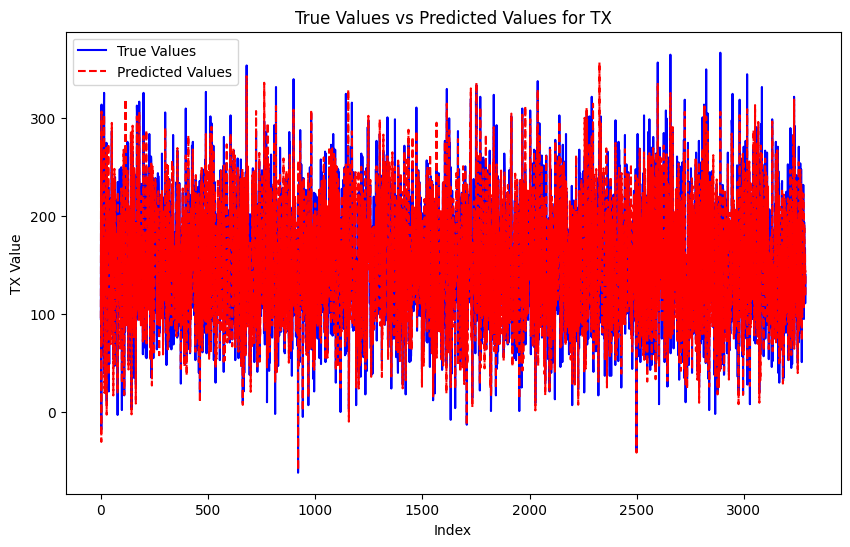

In [13]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are defined from previous steps
# y_test = true target values from test set
# y_pred = predicted values from the model

plt.figure(figsize=(10, 6))
plt.plot(y_test.reset_index(drop=True), label='True Values', color='blue')
plt.plot(y_pred, label='Predicted Values', color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('TX Value')
plt.title('True Values vs Predicted Values for TX')
plt.legend()
plt.show()
